In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm
import numpy as np

In [2]:
air = pd.read_csv('airquality.csv')
air = air[['Unnamed: 0','Solar.R','Wind','Temp','Month','Day','Ozone']]
import warnings
warnings.filterwarnings('ignore')
air.rename(columns={'Unnamed: 0':'SrNo','Solar.R':'SolarRadiation'},inplace=True)

In [113]:
air = air.drop(['ln_solar','exp_solar'],axis=1)
air.head()

,SolarRadiation,Wind,Temp,Month,Day,Ozone
0,190.000000,7.4,67,5,1,41.0
1,118.000000,8.0,72,5,2,36.0
2,149.000000,12.6,74,5,3,12.0
3,313.000000,11.5,62,5,4,18.0
4,185.931507,14.3,56,5,5,17.2


In [4]:
air['SolarRadiation'] = air['SolarRadiation'].fillna(np.mean(air.SolarRadiation))
air['Ozone'] = air.groupby(['Temp'])['Ozone'].transform(lambda x: x.fillna(x.mean()))
air['Ozone'].iloc[4] = 17.2

In [116]:
X = air[['Month','Temp','SolarRadiation','Wind']]
y = air['Ozone']
lm = sm.ols(data=air, formula='y~X').fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                     48.90
Date:                Thu, 18 Jan 2018   Prob (F-statistic):           3.67e-26
Time:                        01:57:40   Log-Likelihood:                -681.43
No. Observations:                 153   AIC:                             1373.
Df Residuals:                     148   BIC:                             1388.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept    -96.5178     19.257     -5.012      0.000      -134.572   -58.464
X[0]          -2.2267      1.366     -1.630      0.105        -4.926     0.473
X[1]           2.0962      0.234      8.958      0.000         1.634     2.559
X[2]           0.0504      0.021      2.432      0.016         0.009     0.091
X[3]          -1.8483      0.550     -3.363      0.001        -2.934    -0.762
==============================================================================
Omnibus:                       48.510   Durbin-Watson:                   1.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              133.572
Skew:                           1.262   Prob(JB):                     9.89e-30
Kurtosis:                       6.819   Cond. No.                     2.46e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [122]:
air.Month.unique()

array([5, 6, 7, 8, 9], dtype=int64)

In [105]:
df.head()

,Wind,Temp,Ozone
0,7.4,67,41.0
1,8.0,72,36.0
2,12.6,74,12.0
3,11.5,62,18.0
4,14.3,56,17.2


In [108]:
lem = sm.ols(data=df,formula='Ozone~).fit()
lem.summary()

SyntaxError: invalid syntax (<ipython-input-108-db046517b4ea>, line 1)

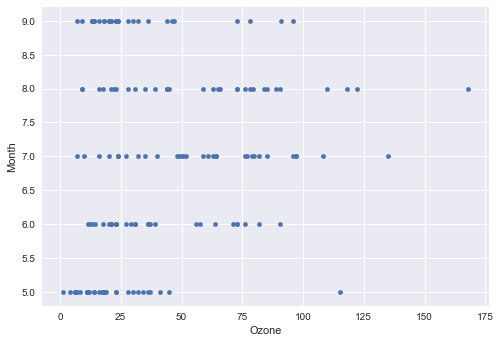

In [87]:
#plt.hist(air.Month,rwidth=0.9)
air.plot(kind='scatter',x='Ozone',y='Month')
#sns.countplot(air.Month)
#sns.distplot(air.Month)
plt.show()

In [71]:
air['exp_solar'] = np.exp(air['SolarRadiation'])

In [62]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 8 columns):
SrNo              153 non-null int64
SolarRadiation    153 non-null float64
Wind              153 non-null float64
Temp              153 non-null int64
Month             153 non-null int64
Day               153 non-null int64
Ozone             153 non-null float64
ln_solar          153 non-null float64
dtypes: float64(4), int64(4)
memory usage: 9.6 KB


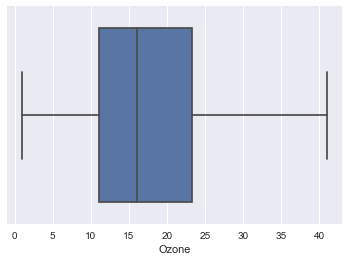

In [118]:
sns.boxplot(df.Ozone)

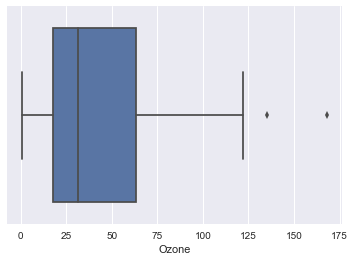

In [117]:
sns.boxplot(air.Ozone)

In [47]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
SrNo              153 non-null int64
SolarRadiation    153 non-null float64
Wind              153 non-null float64
Temp              153 non-null int64
Month             153 non-null int64
Day               153 non-null int64
Ozone             153 non-null float64
dtypes: float64(3), int64(4)
memory usage: 8.4 KB


In [43]:
df = air[(air['Ozone'] < 50) & (air['Temp'] < 70)]
df.head()

,SrNo,SolarRadiation,Wind,Temp,Month,Day,Ozone
0,1,190.000000,7.4,67,5,1,41.0
3,4,313.000000,11.5,62,5,4,18.0
4,5,185.931507,14.3,56,5,5,17.2
5,6,185.931507,14.9,66,5,6,28.0
6,7,299.000000,8.6,65,5,7,23.0


In [44]:
df.Ozone.mean()

17.282291666666666

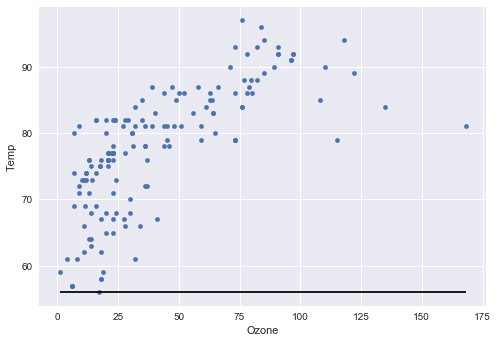

In [46]:
air.plot(kind='scatter',x='Ozone',y='Temp')
plt.hlines(y=56,xmax=air.Ozone.max(), xmin=air.Ozone.min())
plt.show()

In [70]:
np.mean(air.Ozone)

42.12931034482759

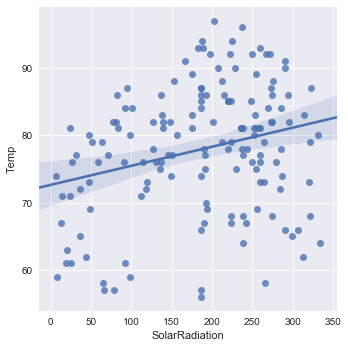

In [7]:
sns.lmplot(data=air,x='SolarRadiation',y='Temp')

In [61]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
SrNo              153 non-null int64
SolarRadiation    153 non-null float64
Wind              153 non-null float64
Temp              153 non-null int64
Month             153 non-null int64
Day               153 non-null int64
Ozone             116 non-null float64
dtypes: float64(3), int64(4)
memory usage: 8.4 KB


In [11]:
air.head()

,SrNo,SolarRadiation,Wind,Temp,Month,Day,Ozone
0,1,190.0,7.4,67,5,1,41.0
1,2,118.0,8.0,72,5,2,36.0
2,3,149.0,12.6,74,5,3,12.0
3,4,313.0,11.5,62,5,4,18.0
4,5,NaN,14.3,56,5,5,NaN
